Neural Networks with TensorFlow/Keras

In [31]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

Load And Process Data

In [32]:
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Normalize the images 

In [33]:
x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0

Flatten the images

In [34]:
x_train = x_train.reshape(-1, 28 * 28)
x_test = x_test.reshape(-1, 28 * 28)

In [35]:

from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, num_classes=10) #the length of the vector equals the number of classes
y_test = to_categorical(y_test, num_classes=10)
y_train = y_train.reshape(-1, 10)

 Define the neural network architecture

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

Define the Feed-Forward Neural Network

In [37]:
FFNN = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),  # Input Layer
    Dropout(0.2),  # Dropout for Regularization
    Dense(64, activation='relu'),  # Hidden Layer
    Dense(10, activation='softmax')  # Output Layer (10 classes)
])

Compile the model

In [38]:
FFNN.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

Train the model

In [39]:
model = FFNN.fit(
    x_train, y_train,
    validation_split=0.2,
    epochs=10,
    batch_size=32,
    verbose=2
)

Epoch 1/10
1500/1500 - 7s - 5ms/step - accuracy: 0.9076 - loss: 0.3120 - val_accuracy: 0.9560 - val_loss: 0.1469
Epoch 2/10
1500/1500 - 6s - 4ms/step - accuracy: 0.9549 - loss: 0.1486 - val_accuracy: 0.9674 - val_loss: 0.1087
Epoch 3/10
1500/1500 - 7s - 4ms/step - accuracy: 0.9660 - loss: 0.1102 - val_accuracy: 0.9701 - val_loss: 0.1022
Epoch 4/10
1500/1500 - 6s - 4ms/step - accuracy: 0.9707 - loss: 0.0927 - val_accuracy: 0.9695 - val_loss: 0.0986
Epoch 5/10
1500/1500 - 7s - 4ms/step - accuracy: 0.9747 - loss: 0.0805 - val_accuracy: 0.9700 - val_loss: 0.1008
Epoch 6/10
1500/1500 - 6s - 4ms/step - accuracy: 0.9760 - loss: 0.0727 - val_accuracy: 0.9763 - val_loss: 0.0839
Epoch 7/10
1500/1500 - 6s - 4ms/step - accuracy: 0.9787 - loss: 0.0647 - val_accuracy: 0.9758 - val_loss: 0.0898
Epoch 8/10
1500/1500 - 6s - 4ms/step - accuracy: 0.9796 - loss: 0.0604 - val_accuracy: 0.9758 - val_loss: 0.0935
Epoch 9/10
1500/1500 - 6s - 4ms/step - accuracy: 0.9825 - loss: 0.0535 - val_accuracy: 0.9755 - 

In [40]:
test_loss, test_acc = FFNN.evaluate(x_test, y_test, verbose=2)
print(f"\nTest Accuracy: {test_acc:.4f}")

313/313 - 1s - 2ms/step - accuracy: 0.9772 - loss: 0.0865

Test Accuracy: 0.9772


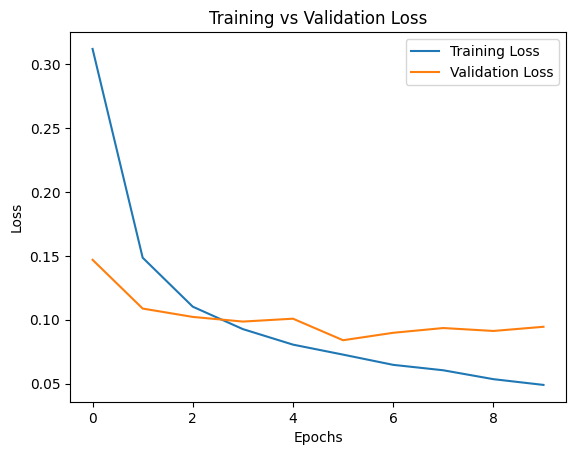

In [41]:
plt.plot(model.history['loss'], label='Training Loss')
plt.plot(model.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Validation Loss')
plt.show()